# QuTiP project 3

J.R. Johansson and P.D. Nation

For more information about QuTiP see [http://qutip.org](http://qutip.org)

modified to include non-RWA dynamics by

Maximilian Russ

In [216]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
%matplotlib inline

In [217]:
'''
QuTiP Tutorial -- useful tools
    * help() / dir()
    * Qobj() --> .dag(), .tr(), .dims, .shape, .data, .full(), .isherm, .type, .eigenenergies(), .eigenstates()
    * basis() / fock(); fock state
    * coherent(); ???
    * thermal(); ???
    * fock_dm(); fock state as density matrix, \rou = |\psi><\psi|
    
    * qeye()
    * sigmax(), sigmay(), sigmaz()
    * destroy() / sigmap(), create() / sigmam(); \sigma_+, \sigma_-
    * commutator()
    * tensor()

    * mesolve(); Master-Equation Solve
    * 

    What are collapse operators? => A collapse operator is an operator that describes how the system is interacting with its environment.
'''

a = destroy(10)
H = a.dag() * a
H

<>:1: SyntaxWarning: invalid escape sequence '\p'
<>:1: SyntaxWarning: invalid escape sequence '\p'
C:\Users\drago\AppData\Local\Temp\ipykernel_11688\3732206296.py:1: SyntaxWarning: invalid escape sequence '\p'
  '''


Quantum object: dims=[[10], [10]], shape=(10, 10), type='oper', dtype=Dia, isherm=True
Qobj data =
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 4. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 5. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 6. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 7. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 8. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 9.]]

## Introduction

The quantum __two-level system (TLS)__ is the simplest possible model to describe the dynamics of a coherently driven system. 

In the version we simulate here, the system is driven by a continuous-mode coherent microwave, whose dipolar interaction with the system is represented by the following Hamiltonain

$$ H =\frac{\hbar}{2} \omega_0 \sigma_z + 2\hbar\Omega\cos\left( \omega_d t +\phi \right) \sigma_x,$$

where $\omega_0$ is the system's transition (Larmor) frequency, $\sigma_i$ with $i=x,y,z$ is Pauli-matrix acting on the TLS system, $\omega_d$ is the microwave frequency, and $\Omega(t)$ is half of the coherent driving strength. The factor 2 becomes clear below.

It is convenient to switch into the rotating frame with respect to the driving frequency $\omega_d$ and phase $\phi$ 

$$ H_r =\frac{\hbar}{2} \left(\omega_0-\omega_d\right) \sigma_z + \hbar\Omega\left[ \left(e^{2i(\omega_d t+\phi)}+1\right)\sigma_+ + \left(e^{-2i(\omega_d t+\phi)}+1\right)\sigma_-\right],$$

where $2\sigma_\pm = \sigma_x \pm i \sigma_y$.

The time-dependence can be removed to simplify the equation above by a __rotating wave approximation (RWA)__. Then,

$$ H_r =\hbar \Delta \sigma_z + \hbar\Omega\sigma_x.$$

Here we used the definition $2\Delta = \omega_0-\omega_d$.



## Rotating Wave Approximation (RWA): weak driving dynamics

In [218]:
def qubit_integrate(delta, rabi, psi0, solver, gamma1 = 0, gamma2 = 0):
    '''
    H = \Delta * \sigma_z + \Omega * \sigma_x
    \Omega = rabi
    '''

    H = delta * sigmaz() + rabi * sigmax()
        
    # collapse operators
    c_ops = []

    if gamma1 > 0.0:
        c_ops.append(np.sqrt(gamma1) * sigmam())

    if gamma2 > 0.0:
        c_ops.append(np.sqrt(gamma2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
        
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, c_ops, e_ops, ntraj=ntraj)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\drago\AppData\Local\Temp\ipykernel_11688\688491448.py:2: SyntaxWarning: invalid escape sequence '\D'
  '''


In [219]:
delta = 0.0 * np.pi   # detuning between TLS frequency and microwave frequency
rabi = 1.0 * np.pi   # Coherent driving strength
gamma2 = 0.0 # Qubit dephasing 
gamma1 = 0.0 # Qubit relaxation

# initial state
psi0 = basis(2,0)

tlist = np.linspace(0,5,200)

# analytic solution
sx_analytic = np.zeros(np.shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist) * np.exp(-tlist * gamma2)
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist * gamma2)

In [220]:
sx1, sy1, sz1 = qubit_integrate(delta, rabi,psi0, "me", gamma1, gamma2)

Text(0, 0.5, 'expectation value')

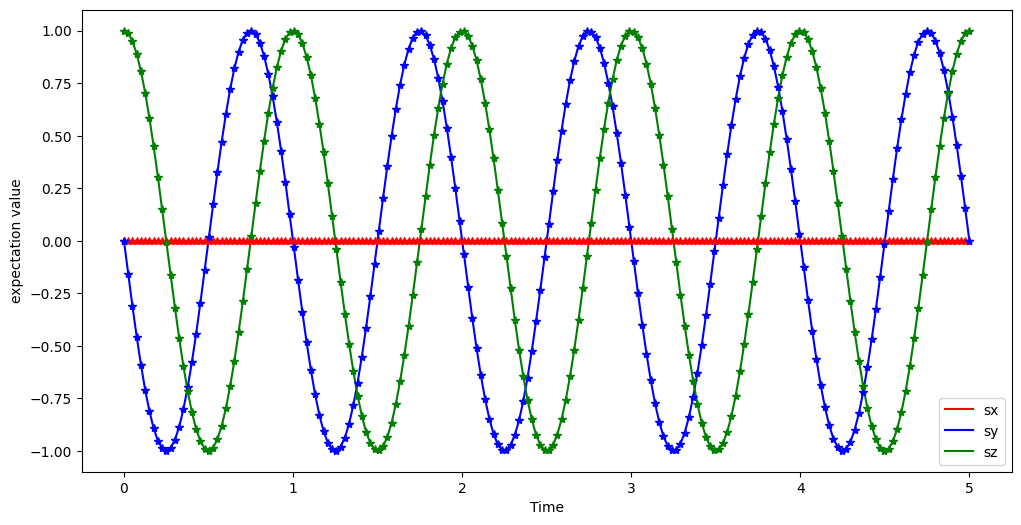

In [221]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx1), 'r')
ax.plot(tlist, np.real(sy1), 'b')
ax.plot(tlist, np.real(sz1), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'b*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value')

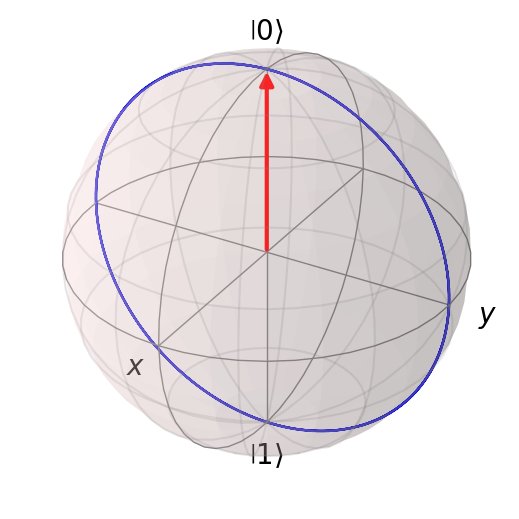

In [222]:
sphere=Bloch()
sphere.add_points([sx1, sy1, sz1], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([0, 0, 1])
sphere.show()

In [223]:
gamma2 = 0.1
sx2, sy2, sz2 = qubit_integrate(delta, rabi,psi0, "me", gamma1 = 0, gamma2 = gamma2)

In [224]:
# analytics
sx_analytic = np.zeros(np.shape(tlist))
sy_analytic = -np.sin(2*np.pi*tlist) * np.exp(-tlist * gamma2)
sz_analytic = np.cos(2*np.pi*tlist) * np.exp(-tlist * gamma2)

Text(0, 0.5, 'expectation value')

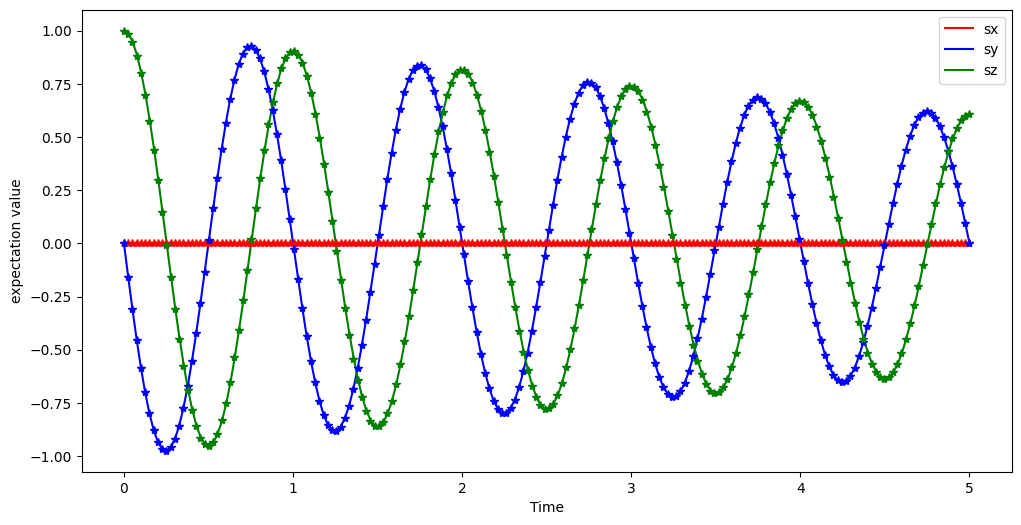

In [225]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx2), 'r')
ax.plot(tlist, np.real(sy2), 'b')
ax.plot(tlist, np.real(sz2), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'b*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value')

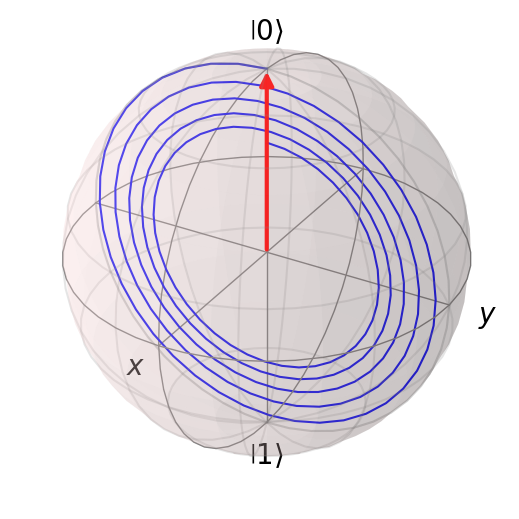

In [226]:
sphere=Bloch()
sphere.add_points([sx2,sy2,sz2], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([0, 0, 1])
sphere.show()

## Beyond Rotating Wave Approximation: strong driving dynamics

In [227]:
def qubit_integrate_brwa(
        omega_0, 
        omega_d, 
        rabi, 
        psi0, 
        solver, 
        phi = 0, 
        gamma1 = 0, 
        gamma2 = 0,
):
    delta = (omega_0 - omega_d) / 2.
    H0 = delta * sigmaz() + rabi * sigmax()
    H1 = rabi * sigmap()
    H2 = rabi * sigmam()
    
    def H1_coeff(t, args):
        return np.exp(2j*(omega_d*t+phi))
    
    def H2_coeff(t, args):
        return np.exp(-2j*(omega_d*t+phi))
    
    
    # collapse operators
    c_ops = []

    if gamma1 > 0.0:
        c_ops.append(np.sqrt(gamma1) * sigmam())

    if gamma2 > 0.0:
        c_ops.append(np.sqrt(gamma2) * sigmaz())

    e_ops = [sigmax(), sigmay(), sigmaz()]
    
    H = [H0, [H1,H1_coeff], [H2,H2_coeff]]
    
    if solver == "me":
        output = mesolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "es":
        output = essolve(H, psi0, tlist, c_ops, e_ops)  
    elif solver == "mc":
        ntraj = 250
        output = mcsolve(H, psi0, tlist, c_ops, e_ops,ntraj=ntraj)  
    else:
        raise ValueError("unknown solver")
        
    return output.expect[0], output.expect[1], output.expect[2]

### Strong driving

In [228]:
omega_0 = 10.0 * np.pi   # resonance frequency
omega_d = 10.0 * np.pi   # drive frequency
rabi    =  1.0 * np.pi   # drive amplitude

gamma1 = 0.0
gamma2 = 0.0

# intial state
psi0 = basis(2,0)

tlist = np.linspace(0,5,200)

# analytics
sx_analytic =   np.zeros(  np.shape(tlist))
sy_analytic = - np.sin  (2 * np.pi * tlist)
sz_analytic =   np.cos  (2 * np.pi * tlist)

sx_brwa_1, sy_brwa_1, sz_brwa_1 = qubit_integrate_brwa(omega_0, omega_d, rabi, psi0, "me", gamma1, gamma2)

Text(0, 0.5, 'expectation value')

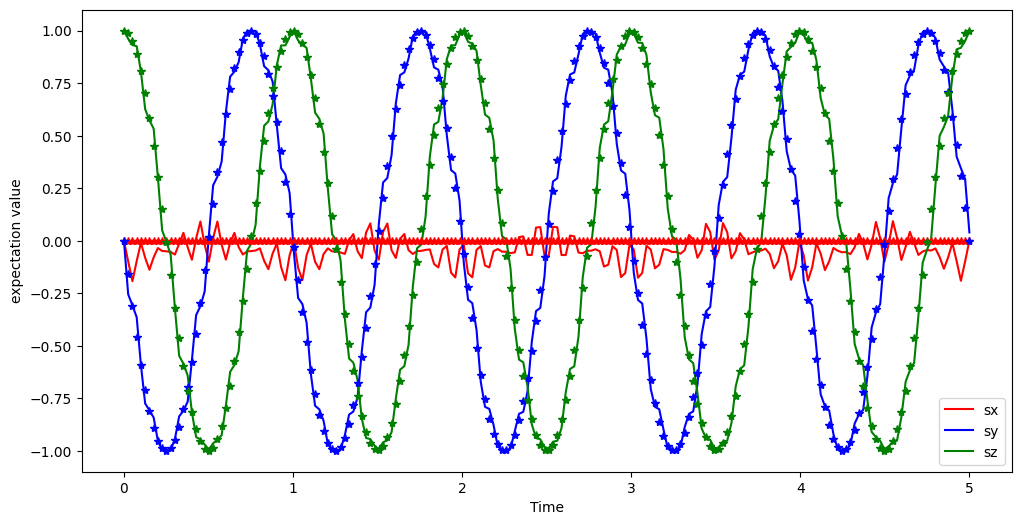

In [229]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx_brwa_1), 'r')
ax.plot(tlist, np.real(sy_brwa_1), 'b')
ax.plot(tlist, np.real(sz_brwa_1), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'b*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value')

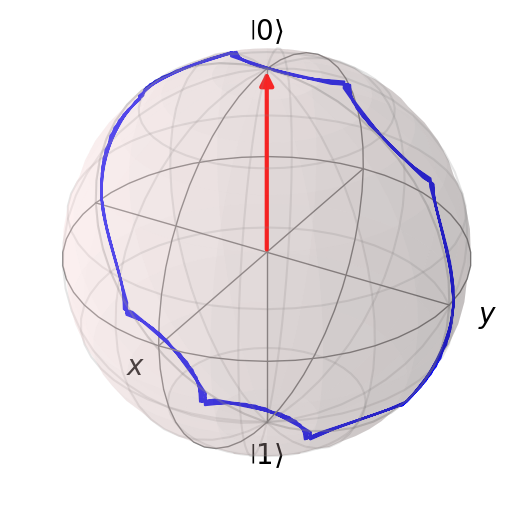

In [230]:
sphere=Bloch()
sphere.add_points([sx_brwa_1,sy_brwa_1,sz_brwa_1], meth='l')
sphere.add_vectors([0, 0, 1], colors=['r'])
sphere.show()

### Ultra-strong driving

In [231]:
omega_0 = 1.0 * np.pi   # resonance frequency
omega_d = 1.0 * np.pi   # drive frequency
rabi   = -1.0 * np.pi   # drive amplitude
gamma2 = 0.0
gamma1 = 0.0

sx_brwa_2, sy_brwa_2, sz_brwa_2 = qubit_integrate_brwa(omega_0, omega_d, rabi, psi0, "me", gamma1, gamma2)

Text(0, 0.5, 'expectation value')

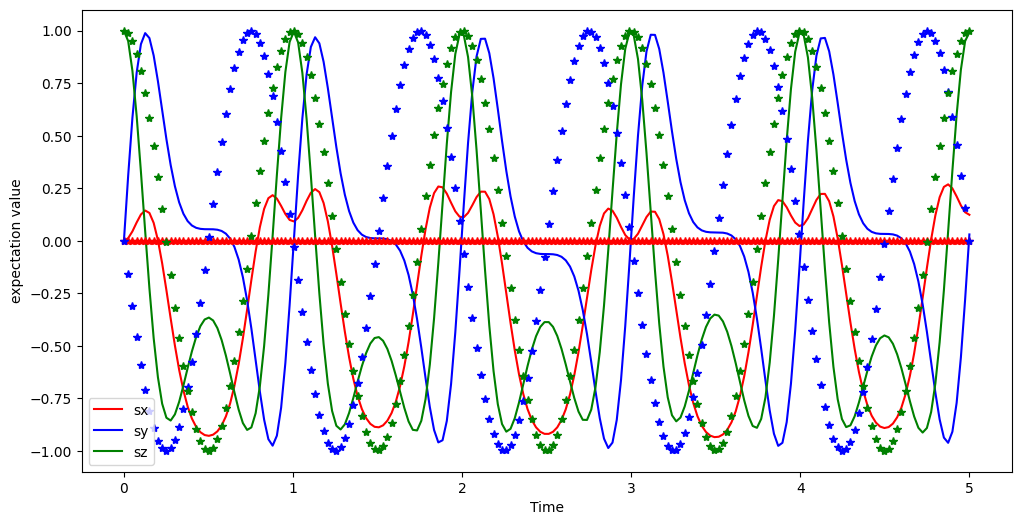

In [232]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx_brwa_2), 'r')
ax.plot(tlist, np.real(sy_brwa_2), 'b')
ax.plot(tlist, np.real(sz_brwa_2), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'b*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value')

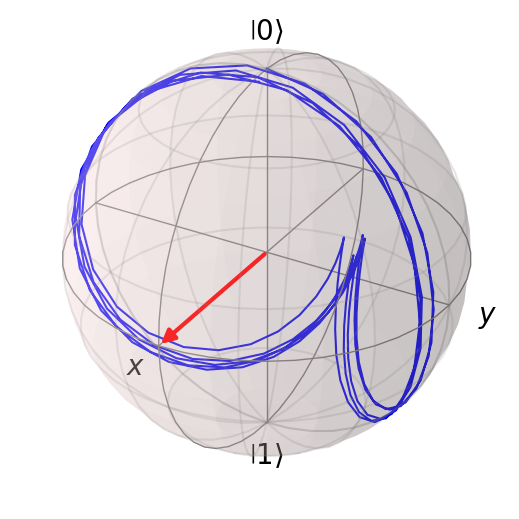

In [233]:
sphere=Bloch()
sphere.add_points([sx_brwa_2,sy_brwa_2,sz_brwa_2], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([1, 0, 0])
sphere.show()

### Deep-strong driving

In [234]:
omega_0 = 0.1 * np.pi   # resonance frequency
omega_d = 0.1 * np.pi   # drive frequency
rabi   = 1.0 * np.pi   # drive amplitude
gamma2 = 0.0
gamma1 = 0.0

sx_brwa_3, sy_brwa_3, sz_brwa_3 = qubit_integrate_brwa(omega_0, omega_d, rabi, psi0, "me", gamma1, gamma2)

Text(0, 0.5, 'expectation value')

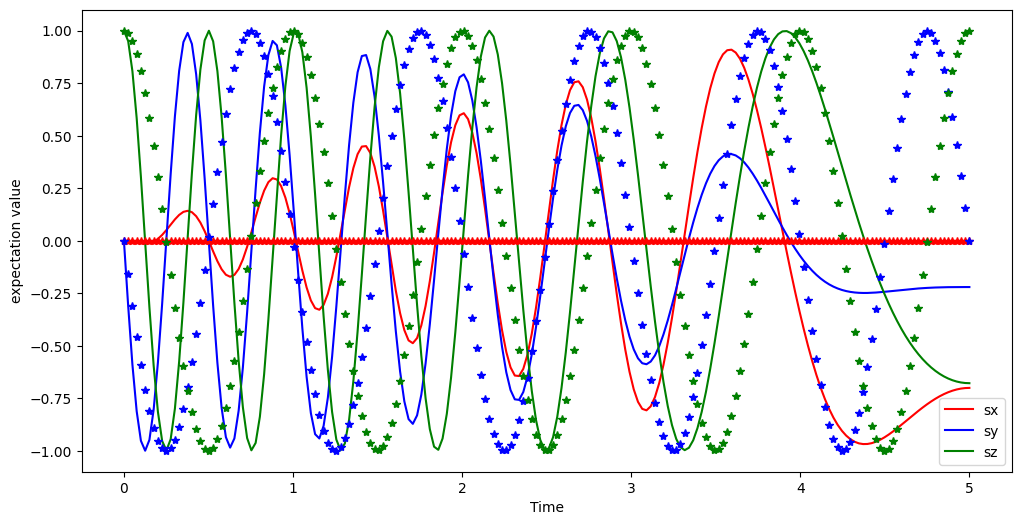

In [235]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(tlist, np.real(sx_brwa_3), 'r')
ax.plot(tlist, np.real(sy_brwa_3), 'b')
ax.plot(tlist, np.real(sz_brwa_3), 'g')
ax.plot(tlist, sx_analytic, 'r*')
ax.plot(tlist, sy_analytic, 'b*')
ax.plot(tlist, sz_analytic, 'g*')
ax.legend(("sx", "sy", "sz"))
ax.set_xlabel('Time')
ax.set_ylabel('expectation value')

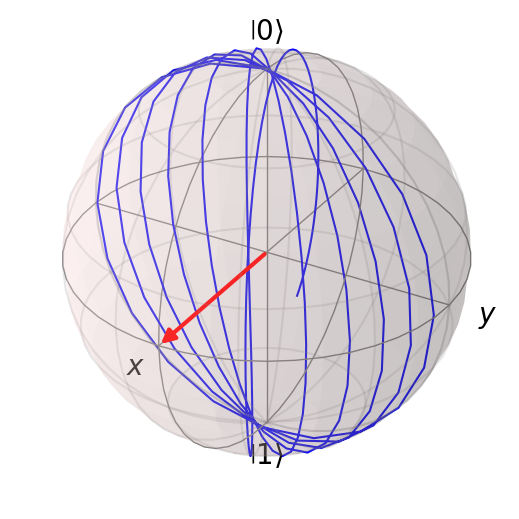

In [236]:
sphere=Bloch()
sphere.add_points([sx_brwa_3, sy_brwa_3, sz_brwa_3], meth='l')
sphere.vector_color = ['r']
sphere.add_vectors([1, 0, 0])
sphere.show()

## Versions

In [237]:
import qutip as qt
qt.__version__

'5.0.4'